In [1]:
# Parameters
path = "C:/Users/SkyNet/Desktop/PyCharmProjects/GLCapstone/media/documents/Data_Set_-_industrial_safety_and_health_database_with_accidents_description_BGQBgOa.csv"


# Capstone Project - Natural Language Processing - Chat Bot Interface

## Exploratory Data Analysis 

Add the Drive function to source raw files

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

Load data set through panda read function

In [3]:
df=pd.read_csv(path)

In [4]:
print("The dataset that we are dealing consists of {} rows & {} columns".format(df.shape[0],df.shape[1]))

The dataset that we are dealing consists of 425 rows & 11 columns


Key summary attributes of the data

In [5]:
df.head()

Unnamed: 0                 Data   Countries     Local Industry Sector  \
0           0  2016-01-01 00:00:00  Country_01  Local_01          Mining   
1           1  2016-01-02 00:00:00  Country_02  Local_02          Mining   
2           2  2016-01-06 00:00:00  Country_01  Local_03          Mining   
3           3  2016-01-08 00:00:00  Country_01  Local_04          Mining   
4           4  2016-01-10 00:00:00  Country_01  Local_04          Mining   

  Accident Level Potential Accident Level Genre Employee or Third Party  \
0              I                       IV  Male             Third Party   
1              I                       IV  Male                Employee   
2              I                      III  Male    Third Party (Remote)   
3              I                        I  Male             Third Party   
4             IV                       IV  Male             Third Party   

         Critical Risk                                        Description  
0              Pressed  While removing the drill rod of the Jumbo 08 f...  
1  Pressurized Systems  During the activation of a sodium sulphide pum...  
2         Manual Tools  In the sub-station MILPO located at level +170...  
3               Others  Being 9:45 am. approximately in the Nv. 1880 C...  
4               Others  Approximately at 11:45 a.m. in circumstances t...

In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


Except the indexing column 'Unnamed' being integer , all other columns are of datatype object

Let's drop the indexing column as it may not be required further

In [7]:
df=df.drop(['Unnamed: 0'],axis=1)

In [8]:
df.head()

Data   Countries     Local Industry Sector Accident Level  \
0  2016-01-01 00:00:00  Country_01  Local_01          Mining              I   
1  2016-01-02 00:00:00  Country_02  Local_02          Mining              I   
2  2016-01-06 00:00:00  Country_01  Local_03          Mining              I   
3  2016-01-08 00:00:00  Country_01  Local_04          Mining              I   
4  2016-01-10 00:00:00  Country_01  Local_04          Mining             IV   

  Potential Accident Level Genre Employee or Third Party        Critical Risk  \
0                       IV  Male             Third Party              Pressed   
1                       IV  Male                Employee  Pressurized Systems   
2                      III  Male    Third Party (Remote)         Manual Tools   
3                        I  Male             Third Party               Others   
4                       IV  Male             Third Party               Others   

                                         Description  
0  While removing the drill rod of the Jumbo 08 f...  
1  During the activation of a sodium sulphide pum...  
2  In the sub-station MILPO located at level +170...  
3  Being 9:45 am. approximately in the Nv. 1880 C...  
4  Approximately at 11:45 a.m. in circumstances t...

##Missing values check

In [9]:
df.isna().sum()

Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

In [10]:
df.isnull().sum()

Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

In [11]:
#check for duplicates
df.duplicated().any()

True

There are no missing values in this dataset, lets check some key attributes of the data like :
1. Unique Values
2. Top occuring values 
3. Occurence Frequency

In [12]:
df.describe().T

count unique  \
Data                       425    287   
Countries                  425      3   
Local                      425     12   
Industry Sector            425      3   
Accident Level             425      5   
Potential Accident Level   425      6   
Genre                      425      2   
Employee or Third Party    425      3   
Critical Risk              425     33   
Description                425    411   

                                                                        top  \
Data                                                    2017-02-08 00:00:00   
Countries                                                        Country_01   
Local                                                              Local_03   
Industry Sector                                                      Mining   
Accident Level                                                            I   
Potential Accident Level                                                 IV   
Genre                                                                  Male   
Employee or Third Party                                         Third Party   
Critical Risk                                                        Others   
Description               During the activity of chuteo of ore in hopper...   

                         freq  
Data                        6  
Countries                 251  
Local                      90  
Industry Sector           241  
Accident Level            316  
Potential Accident Level  143  
Genre                     403  
Employee or Third Party   189  
Critical Risk             232  
Description                 3

Column Names like  Data, Employee or third party and Genere seems to be incorrect and its better to rename them to Date and Gender & Employment Type as it makes more sense

In [13]:
df = df.rename(columns = {'Data': 'Date', 'Genre': 'Gender','Employee or Third Party':'Employment Type'}, inplace = False)

In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].apply(lambda x : x.year)
df['Month'] = df['Date'].apply(lambda x : x.month)
df['Day'] = df['Date'].apply(lambda x : x.day)
df['Weekday'] = df['Date'].apply(lambda x : x.day_name())
df.head(3)

Date   Countries     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   

  Potential Accident Level Gender       Employment Type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   

     Weekday  
0     Friday  
1   Saturday  
2  Wednesday

As described in the problem statement the date column has the timestamp of the event and it may be easy to just have the year, month and Day of the occurence

Now , Let's drop the Date column

In [15]:
df=df.drop(['Date'],axis=1)

In [16]:
df.head()

Countries     Local Industry Sector Accident Level  \
0  Country_01  Local_01          Mining              I   
1  Country_02  Local_02          Mining              I   
2  Country_01  Local_03          Mining              I   
3  Country_01  Local_04          Mining              I   
4  Country_01  Local_04          Mining             IV   

  Potential Accident Level Gender       Employment Type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1   10   

     Weekday  
0     Friday  
1   Saturday  
2  Wednesday  
3     Friday  
4     Sunday

#  Data Visualization

In [17]:
import warnings
warnings.filterwarnings("ignore")

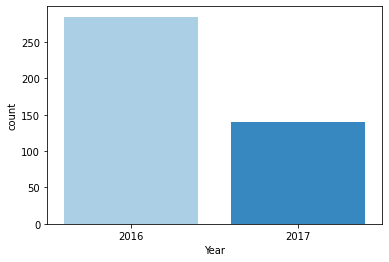

In [18]:
#year_split=df['Year'].value_counts()
sns.countplot(df['Year'],orient="h",saturation=1,palette='Blues');

In [19]:
Y=df['Year'].value_counts(normalize=True)
print("The number of accidents in {} and in {}".format(Y[:1],Y[1:]))

The number of accidents in 2016    0.670588
Name: Year, dtype: float64 and in 2017    0.329412
Name: Year, dtype: float64


The number of accidents in 2017 has been reduced by almost half

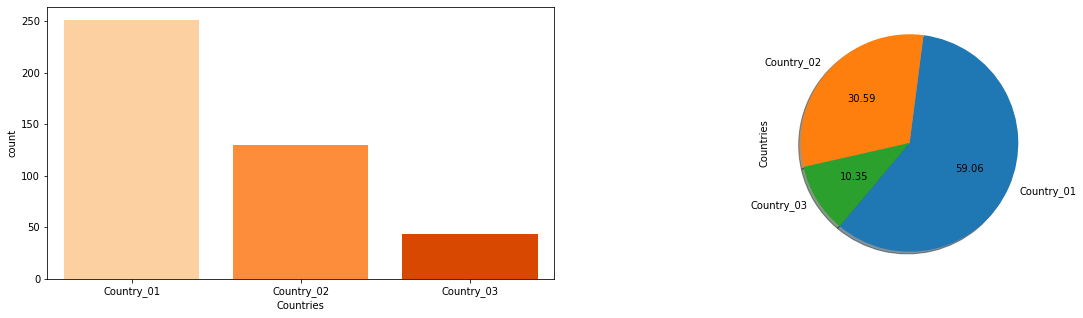

In [20]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
sns.countplot(df['Countries'],orient="h",saturation=1,palette='Oranges',ax=ax[0]);
cty=df.groupby('Countries')['Countries'].count()
cty.plot.pie(shadow=True, startangle=230,autopct='%.2f',ax=ax[1]);

Country_01 is more accident prone and Counrty_03 is less prone to accidents

Below is the city wise representation of accident occurece during the time 2016-2017

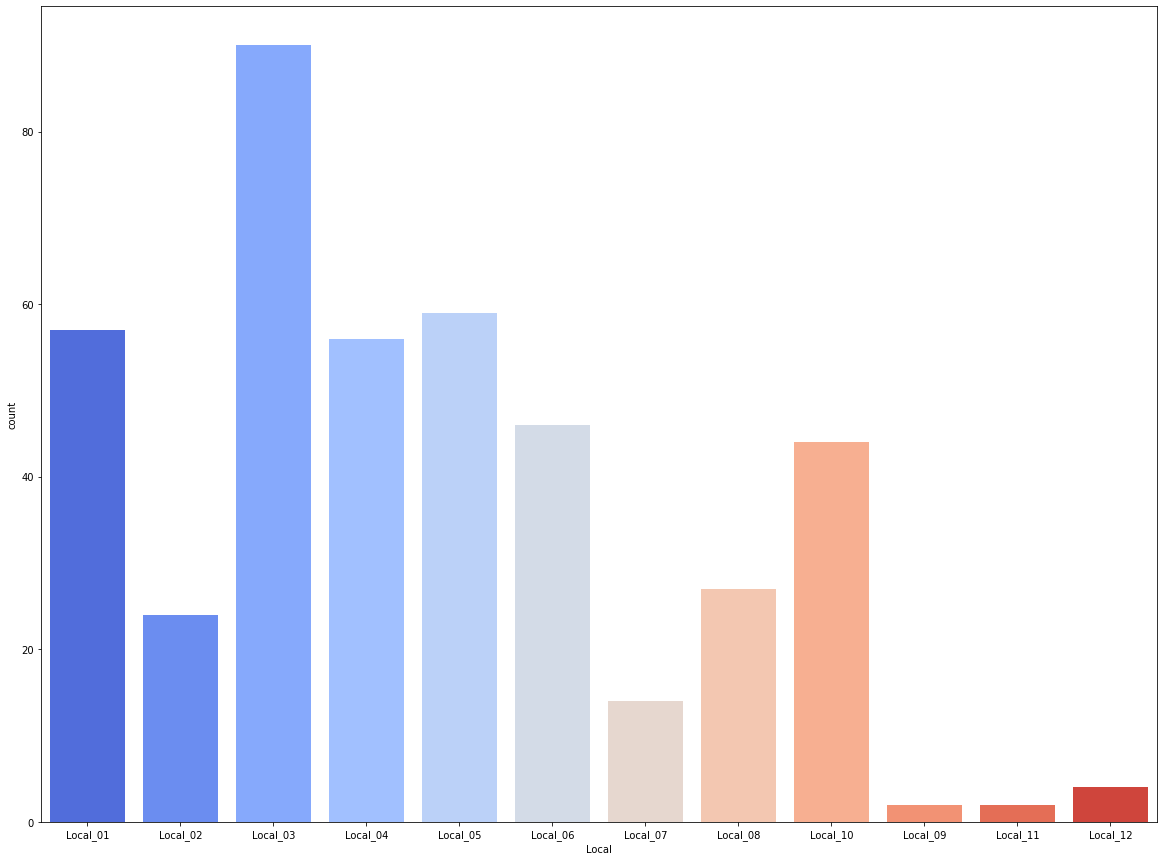

In [21]:
plt.figure(figsize=(20,15))
sns.countplot(df['Local'],orient="h",saturation=1,palette='coolwarm');

Industry wise picturization of accidents , from the below it is evident that mining industry is unfortunate to record more accidents

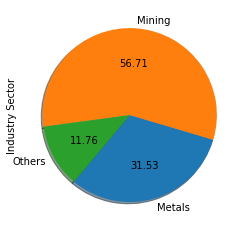

In [22]:
ind=df.groupby('Industry Sector')['Industry Sector'].count()
ind.plot.pie(shadow=True, startangle=230,autopct='%.2f');
#sns.countplot(df['Industry Sector'],orient="h",saturation=1,palette='terrain')

Accident counts based on severity level


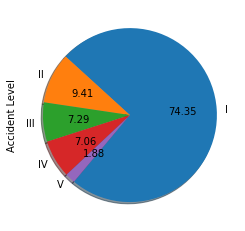

In [23]:
ac_lvl=df.groupby('Accident Level')['Accident Level'].count()
print("Accident counts based on severity level")
ac_lvl.plot.pie(shadow=True, startangle=230,autopct='%.2f');
#sns.countplot(df['Accident Level'],orient="h",saturation=1,palette='cubehelix');

while 75% of accidents are minor(level 1), nearly 9 % of accidents are sevre and 16 % of accidents are mild/less critical

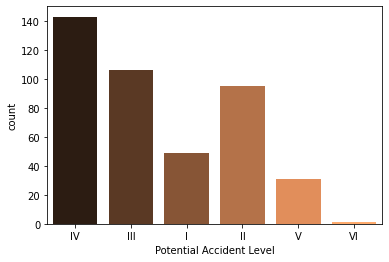

In [24]:
sns.countplot(df['Potential Accident Level'],orient="h",saturation=1,palette='copper');

Potential accident level IV and III comprise of majority of events

Type of Injured person
Third Party             0.444706
Employee                0.421176
Third Party (Remote)    0.134118
Name: Employment Type, dtype: float64


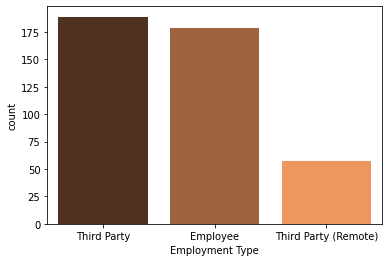

In [25]:
print("Type of Injured person")
print(df['Employment Type'].value_counts(normalize=True))
sns.countplot(df['Employment Type'],orient="h",saturation=1,palette='copper');

Third Party employees are impacted the most by recorded accidents followed by internal employees and then third party employees in remote location

some description of the risk involved in the accident


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Others'),
  Text(1, 0, 'Pressed'),
  Text(2, 0, 'Manual Tools'),
  Text(3, 0, 'Chemical substances'),
  Text(4, 0, 'Venomous Animals'),
  Text(5, 0, 'Cut'),
  Text(6, 0, 'Projection'),
  Text(7, 0, 'Bees'),
  Text(8, 0, 'Fall'),
  Text(9, 0, 'Vehicles and Mobile Equipment'),
  Text(10, 0, 'Pressurized Systems'),
  Text(11, 0, 'Fall prevention (same level)'),
  Text(12, 0, 'remains of choco'),
  Text(13, 0, 'Fall prevention'),
  Text(14, 0, 'Suspended Loads'),
  Text(15, 0, 'Blocking and isolation of energies'),
  Text(16, 0, 'Power lock'),
  Text(17, 0, 'Pressurized Systems / Chemical Substances'),
  Text(18, 0, 'Liquid Metal'),
  Text(19, 0, 'Projection of fragments'),
  Text(20, 0, 'Machine Protection'),
  Text(21, 0, 'Electrical Shock'),
  Text(22, 0, 'Electrical installation'),
  Text(23, 0, '\nNot applicable'),
  Text(2

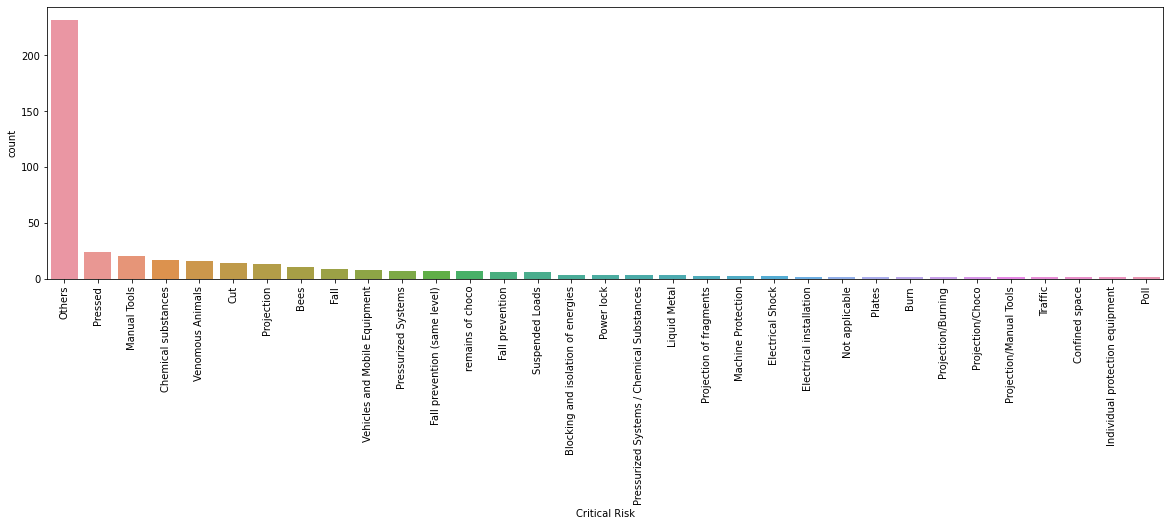

In [26]:
print("some description of the risk involved in the accident")
plt.figure(figsize=(20,5))
descending_order = df['Critical Risk'].value_counts().sort_values(ascending=False).index
sns.countplot(x=df['Critical Risk'],order=descending_order)
plt.xticks(rotation = 'vertical')

Critical risk is being attributed through various reasons and the distributon shows that for majority of accidents is the critical risk has not been documented.

In [27]:
df_ct1=df[df['Countries']=='Country_01']
df_ct2=df[df['Countries']=='Country_03']
df_ct3=df[df['Countries']=='Country_03']

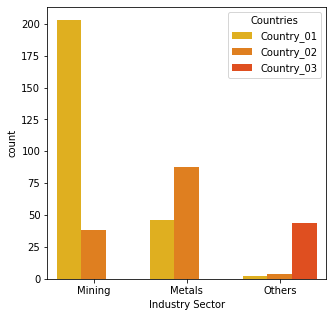

In [28]:
plt.figure(figsize=(5,5))
sns.countplot(df['Industry Sector'],hue=df['Countries'],palette='autumn_r')
plt.show();

Distribution of accidents by Country shows country 01 has maximum accidents in mining sector whereas for Country 02 the maximum accidents happen in metals / industry sector. The Country 03 has most of its accidents not labelled with a specific sector.

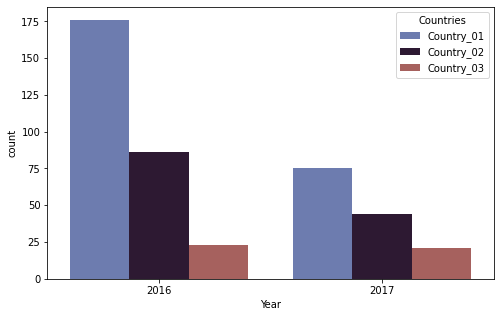

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(df['Year'],hue=df['Countries'],palette='twilight')
plt.show();

There is a decreasing trend in accidents recorded in three countries from 2016 to 2017

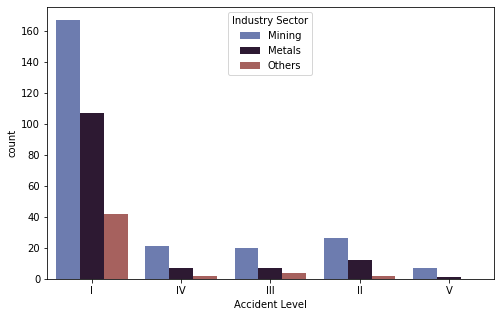

In [30]:
plt.figure(figsize=(8,5))
sns.countplot(df['Accident Level'],hue=df['Industry Sector'],palette='twilight')
plt.show();

Majority of accidents across industries and countries belong to Accident level I

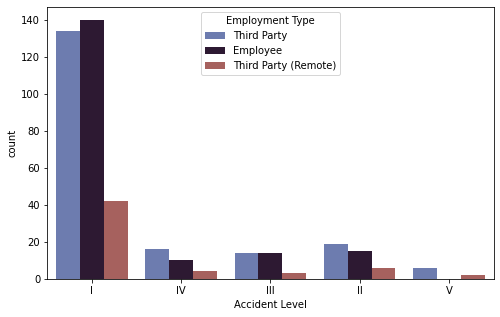

In [31]:
plt.figure(figsize=(8,5))
sns.countplot(df['Accident Level'],hue=df['Employment Type'],palette='twilight')
plt.show();

# Let's check some hypothesis

In [32]:
import scipy.stats as stats
TAB=pd.crosstab(df['Accident Level'],df['Gender'])
chi,p_value,dof,expected=stats.chi2_contingency(TAB)

H0="Gender does not have an influence on Accident Level"
Ha="Gender does have an influence on Accident Level"

if p_value < 0.05:
    #Reject Null
    print(Ha)
else:
    #Fail to reject Null
    print(H0)

Gender does not have an influence on Accident Level


In [33]:
TAB=pd.crosstab(df['Accident Level'],df['Industry Sector'])
chi,p_value,dof,expected=stats.chi2_contingency(TAB)

H0="Industry does not have an influence on Accident Level"
Ha="Industry does have an influence on Accident Level"

if p_value < 0.05:
    #Reject Null
    print(Ha)
else:
    #Fail to reject Null
    print(H0)

Industry does not have an influence on Accident Level


In [34]:
TAB=pd.crosstab(df['Accident Level'],df['Employment Type'])
chi,p_value,dof,expected=stats.chi2_contingency(TAB)

H0="Employment nature does not have an influence on Accident Level"
Ha="Employment nature does have an influence on Accident Level"

if p_value < 0.05:
    #Reject Null
    print(Ha)
else:
    #Fail to reject Null
    print(H0)

Employment nature does not have an influence on Accident Level


Gender, Industry and Employment nature do not have direct influence over Accident level

#### Function to identify  relation between Accident Level/Potential Accident levels

1. Based on Gender

In [35]:
def target_count(df, col1):
    fig = plt.figure(figsize = (15, 7.2))
    ax = fig.add_subplot(121)
    sns.countplot(x = col1, data = df, ax = ax, orient = 'v',
                  hue = 'Accident Level').set_title(col1.capitalize() +' count plot by Accident Level', 
                                                                      fontsize = 13)
    plt.legend(labels = df['Accident Level'].unique())
    plt.xticks(rotation = 90)
    
    ax = fig.add_subplot(122)
    sns.countplot(x = col1, data = df, ax = ax, orient = 'v', 
                  hue = 'Potential Accident Level').set_title(col1.capitalize() +' count plot by Potential Accident Level', 
                                                                      fontsize = 13)
    plt.legend(labels = df['Potential Accident Level'].unique())
    plt.xticks(rotation = 90)
    return plt.show()

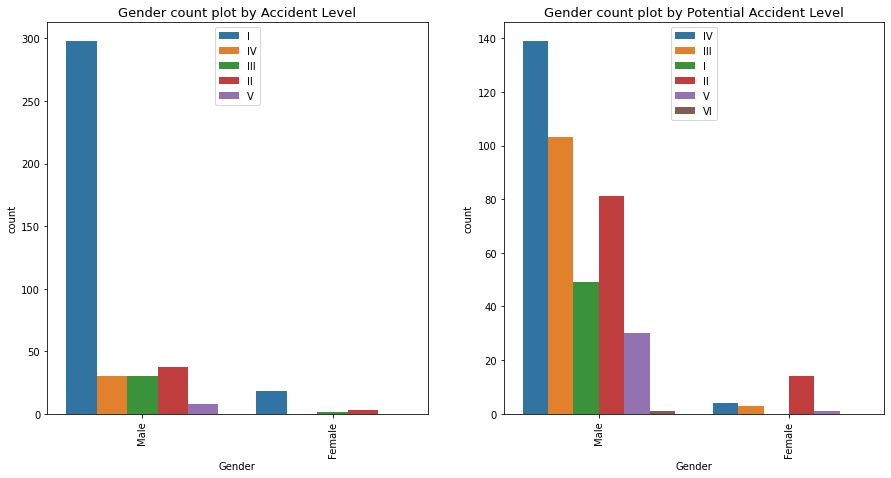

In [36]:
target_count(df, 'Gender')

From the above analysis it is evident that the Male employees tend to be part of events with accident level I while the same events have varied potential accident levels from I to VI. For Females the above correlation is difficult to be ascertaned due to less data.

2. Based on Employee type

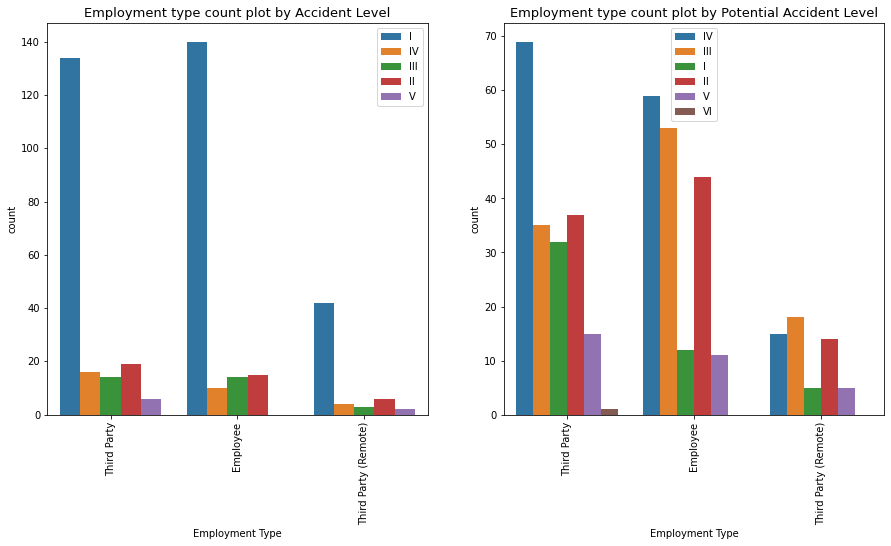

In [37]:
target_count(df, 'Employment Type')

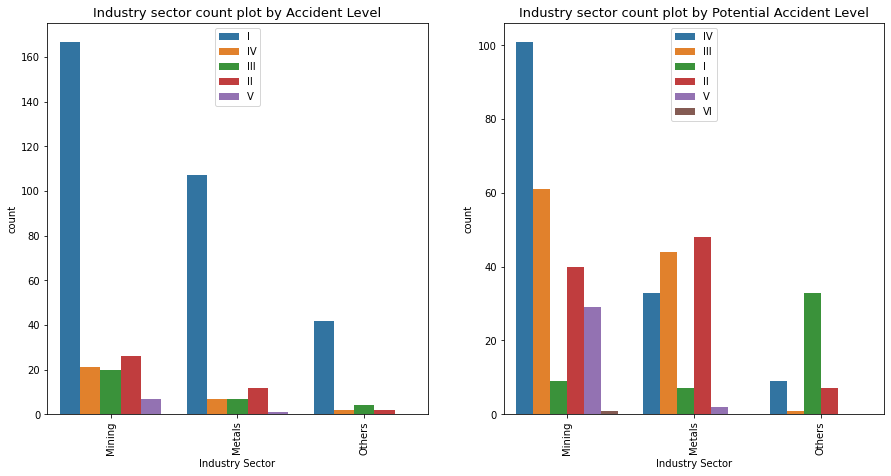

In [38]:
target_count(df, 'Industry Sector')

Analysis of Month with repect to Accident/ Potential Accident Level

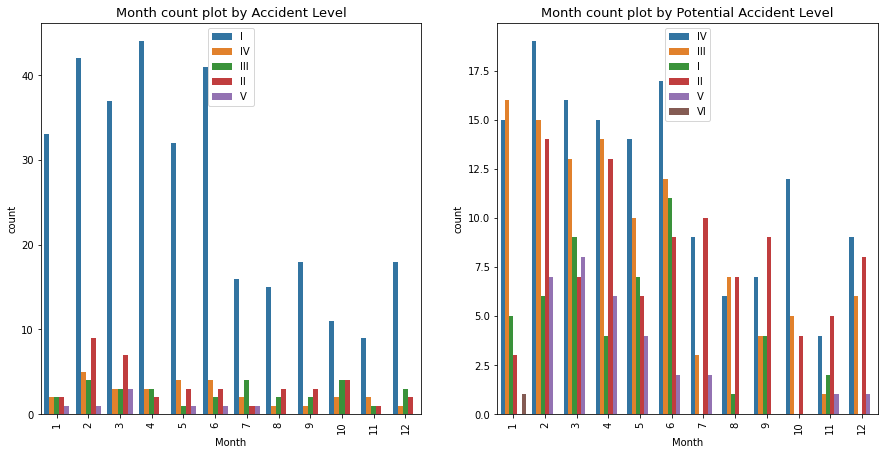

In [39]:
target_count(df, 'Month')

Accidents recorded quarter wise


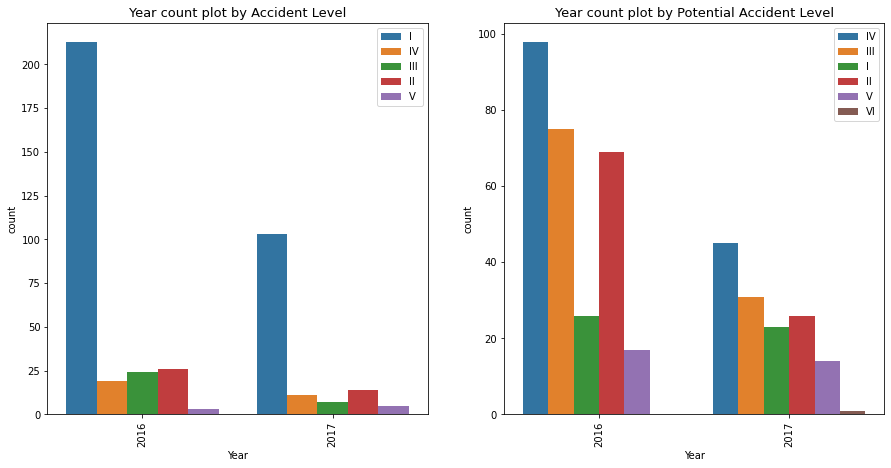

In [40]:
print("Accidents recorded quarter wise")
target_count(df, 'Year')

Analysis of Weekday wrt Accident/ Potential Accident Level

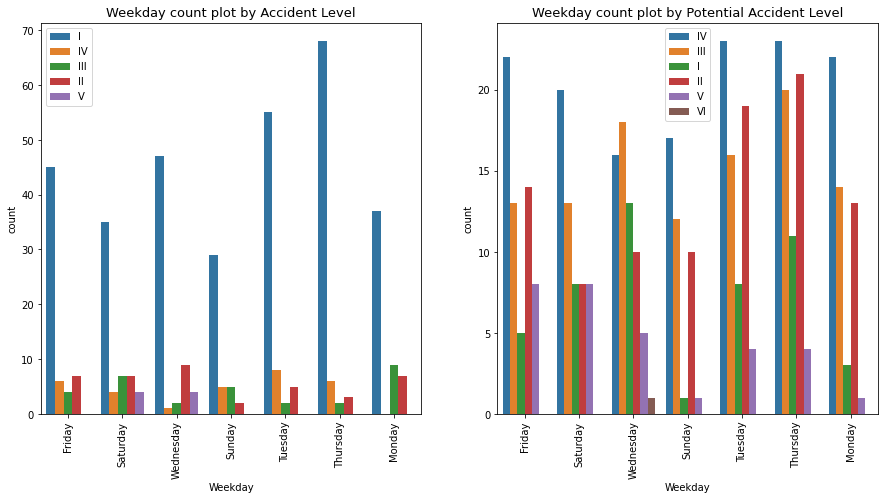

Day of the week does have an influence on Accident Level
Day of the week does not have an influence on Potential Accident Level


In [41]:
target_count(df, 'Weekday')
import scipy.stats as stats
TAB=pd.crosstab(df['Accident Level'],df['Weekday'])
TAB1=pd.crosstab(df['Potential Accident Level'],df['Weekday'])
chi,p_value,dof,expected=stats.chi2_contingency(TAB)

H0="Day of the week does not have an influence on Accident Level"
Ha="Day of the week does have an influence on Accident Level"

if p_value < 0.05:
    #Reject Null
    print(Ha)
else:
    #Fail to reject Null
    print(H0)

chi,p_value,dof,expected=stats.chi2_contingency(TAB1)

H0="Day of the week does not have an influence on Potential Accident Level"
Ha="Day of the week does have an influence on Potential Accident Level"

if p_value < 0.05:
    #Reject Null
    print(Ha)
else:
    #Fail to reject Null
    print(H0)

From the above analysis it is evident that while Accident level I tend to comprise majority of events across Gender, employment type, industry and date/time, the potential accident level is spread across all categories. This implies that definition to identify accident level and potential accident level is different and this can play an important role in overall output.

## Data Preprocessing

Key attributes of the description of the accident field

<AxesSubplot:>

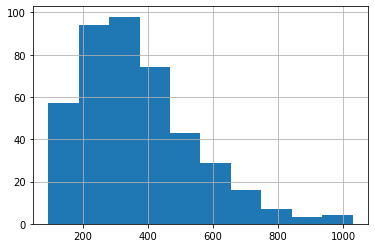

In [42]:
##Number of characters present in each sentence.
df['Description'].str.len().hist()

<AxesSubplot:>

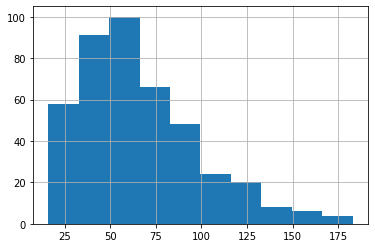

In [43]:
## Number of words appearing in each description
df['Description'].str.split().map(lambda x: len(x)).hist()

<AxesSubplot:>

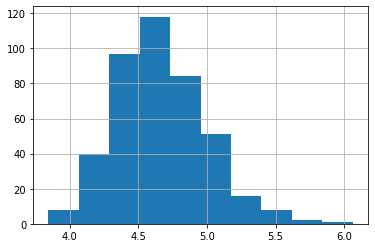

In [44]:
#Average word length
df['Description'].str.split().apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

Now let's get into text preprocessing, Please find the list of steps accomplished 

1. Removal of punctuation/ special characters
2. Coversion to lower case
3. Stop words removal
4. Ngram model (Unigram/Bigram and Trigram)
5. Lemmatization

In [45]:
#Removal of punctuation/ special charecters
df['Description_cleaned']=df['Description'].apply(lambda x: re.sub(r'[^A-Za-z]+',' ',x))

In [46]:
print("Before Pre-processing")
print("###########################################################")
print(df['Description'][1])
print("After Pre-Processing")
print("###########################################################")
print(df['Description_cleaned'][1])

Before Pre-processing
###########################################################
During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.
After Pre-Processing
###########################################################
During the activation of a sodium sulphide pump the piping was uncoupled and the sulfide solution was designed in the area to reach the maid Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital Note of sulphide solution grams liter 


In [47]:
#Coversion to lower case
df['Description_cleaned']=df['Description_cleaned'].apply(lambda x: x.lower())

In [48]:
print("Before case conversion")
print("###########################################################")
print(df['Description'][1])
print("After Case conversion")
print("###########################################################")
print(df['Description_cleaned'][1])

Before case conversion
###########################################################
During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.
After Case conversion
###########################################################
during the activation of a sodium sulphide pump the piping was uncoupled and the sulfide solution was designed in the area to reach the maid immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital note of sulphide solution grams liter 


In [49]:
df.to_csv('cleaned_df.csv')

In [50]:
#Removal of stop words

In [51]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SkyNet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
from nltk.corpus import stopwords
stopwords=set(stopwords.words('english'))

In [53]:
df['Description_cleaned']=df['Description_cleaned'].apply(lambda x: ' '.join([words for words in x.split() if words not in stopwords]))

In [54]:
print("Before Stop words removal")
print("###########################################################")
print(df['Description'][1])
print("After Stop words removal")
print("###########################################################")
print(df['Description_cleaned'][1])

Before Stop words removal
###########################################################
During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.
After Stop words removal
###########################################################
activation sodium sulphide pump piping uncoupled sulfide solution designed area reach maid immediately made use emergency shower directed ambulatory doctor later hospital note sulphide solution grams liter


In [55]:
# replacing categorical values
replace_struc = {'Local_01': 1, 'Local_02': 2, 'Local_03': 3, 'Local_04': 4, 'Local_05': 5, 'Local_06': 6, 'Local_07': 7, 'Local_08': 8, 'Local_09': 9, 'Local_10': 10, 'Local_11': 11, 'Local_12': 12}
df['Local'] = df['Local'].map(replace_struc)
replace_struc = {'I': 0, 'II': 1, 'III': 3, 'IV': 4, 'V': 5}
df['Accident Level'] = df['Accident Level'].map(replace_struc)
replace_struc = {'I': 0, 'II': 1, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6}
df['Potential Accident Level'] = df['Potential Accident Level'].map(replace_struc)
del replace_struc

In [56]:
df.head(3)

Countries  Local Industry Sector  Accident Level  \
0  Country_01      1          Mining               0   
1  Country_02      2          Mining               0   
2  Country_01      3          Mining               0   

   Potential Accident Level Gender       Employment Type        Critical Risk  \
0                         4   Male           Third Party              Pressed   
1                         4   Male              Employee  Pressurized Systems   
2                         3   Male  Third Party (Remote)         Manual Tools   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   

     Weekday                                Description_cleaned  
0     Friday  removing drill rod jumbo maintenance superviso...  
1   Saturday  activation sodium sulphide pump piping uncoupl...  
2  Wednesday  sub station milpo located level collaborator e...

In [57]:
def ngram_func(ngram, trg='', trg_value=''):
    #trg_value is list-object
    if (trg == '') or (trg_value == ''):
        string_filterd =  df['Description_cleaned'].sum().split()
    else:
        string_filterd =  df[df[trg].isin(trg_value)]['Description_cleaned'].sum().split()
    dic = nltk.FreqDist(nltk.ngrams(string_filterd, ngram)).most_common(30)
    ngram_df = pd.DataFrame(dic, columns=['ngram','count'])
    ngram_df.index = [' '.join(i) for i in ngram_df.ngram]
    ngram_df.drop('ngram',axis=1, inplace=True)
    return ngram_df

**Lemmatization**

In [58]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [59]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SkyNet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [60]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SkyNet\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [61]:
def _nlp_preprocess_text(text):
  corpus=[]
  lem=WordNetLemmatizer()
  ignore_words = ['?', '!']
  for news in text:
      words=[w for w in word_tokenize(news) if (w not in ignore_words)]
      words=[lem.lemmatize(w) for w in words if len(w)>2]
      words = sorted(list(set(words)))
      corpus.append(words)
  return corpus

In [62]:
corpus = _nlp_preprocess_text(df['Description_cleaned'])

In [63]:
# print (len(corpus), "unique lemmatized words", corpus)